**Fellowship.AI Cohort 25 NLP Challenge**

In this challenge, I created a model that can perform sentimental analysis on IMDB movies dataset.

In [181]:
# importing the necessary libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize,sent_tokenize
from wordcloud import WordCloud
import os
import re
import warnings

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [182]:
# Loading the data
imdb = pd.read_csv('/content/drive/MyDrive/ML DataSets/IMDB_dataset.csv')
imdb.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [183]:
imdb.isnull().sum()

review       0
sentiment    0
dtype: int64

In [184]:
#Describing the dataset
imdb.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, **kwargs)>

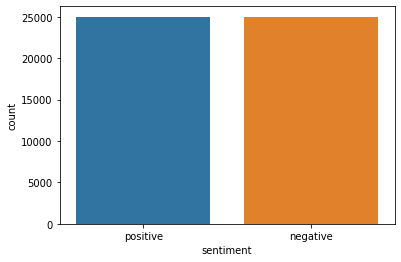

In [185]:
#Plotting the data
sns.countplot(x='sentiment', data=imdb)
plt.title

In [186]:
# Conveting our target column "Sentiment" into numerical format. Positve to 1 and negative to zero
imdb.sentiment.replace("positive", 1, inplace=True)
imdb.sentiment.replace("negative", 0, inplace=True)
imdb.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [187]:
#Generating the word counts
def words_count(text):
  words = text.split()
  word_count = len(words)
  return word_count

In [188]:
imdb['word count'] = imdb['review'].apply(words_count)
imdb.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,0,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230


**TEXT PREPROCESSING**


This is done to turn the data into usable format.

In [189]:
def text_processing(text):
  text = text.lower()    # lowering the text case
  text = re.sub('br />', '', text) #removing the break tag
  text = re.sub(r"https\S+|http\S+", '', text, flags = re.MULTILINE) #removing the url
  text = re.sub(r'\@w+|\#', '', text) #romving ash tags and symbols
  text = re.sub(r'[^\w\s]',  '', text) #removing the puntuations
  text_tokens = word_tokenize(str(text)) # tokenizing the text in the review
  filtered_text = [w for w in text_tokens if not w in stop_words] # removing the stop words
  text = " ".join(filtered_text)
  return text

In [190]:
imdb_review = imdb['review'].apply(text_processing)
imdb_review

0        one reviewers mentioned watching 1 oz episode ...
1        wonderful little production filming technique ...
2        thought wonderful way spend time hot summer we...
3        basically theres family little boy jake thinks...
4        petter matteis love time money visually stunni...
                               ...                        
49995    thought movie right good job wasnt creative or...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary schools n...
49998    im going disagree previous comment side maltin...
49999    one expects star trek movies high art fans exp...
Name: review, Length: 50000, dtype: object

In [191]:
# Performing Stemming on the dataset
stemmer = PorterStemmer()
def stemming(data):
  text = [stemmer.stem(word) for word in data]
  return data

In [192]:
imdb_review.new = imdb_review.apply(stemming)
imdb_review.new

0        one reviewers mentioned watching 1 oz episode ...
1        wonderful little production filming technique ...
2        thought wonderful way spend time hot summer we...
3        basically theres family little boy jake thinks...
4        petter matteis love time money visually stunni...
                               ...                        
49995    thought movie right good job wasnt creative or...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary schools n...
49998    im going disagree previous comment side maltin...
49999    one expects star trek movies high art fans exp...
Name: review, Length: 50000, dtype: object

# **Model Deployment**

In [193]:
#convert the review into a matrix of token counts
message = CountVectorizer(analyzer=text_processing).fit_transform(imdb_review.new)

In [194]:
#Defining input and target variable
x = message
y = imdb['sentiment']

In [195]:
# Training and splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


In [201]:
#Creating and Training the model
model = MultinomialNB()
# Training the model
model.fit(x_train, y_train)


MultinomialNB()

In [202]:
#Create the predictions on the test data
predictions = model.predict(x_test)
predictions


array([0, 1, 1, ..., 1, 1, 1])

In [198]:
#Checking the precision, recall and f1-score
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.61      0.64      0.63      5035
           1       0.62      0.58      0.60      4965

    accuracy                           0.61     10000
   macro avg       0.61      0.61      0.61     10000
weighted avg       0.61      0.61      0.61     10000



In [199]:
# 6 To know the score from the confussion matrix, use accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.6134

# **Conclusion**

The movie dataset was cleaned by applying text preprocessing before stemming was applied. The prediction of 61% seem low. This can be improve by improved data cleanning and effective feature engineering.Two or more models can also be combined into one for better prediction. 